決定木

問題１〜４で順番に関数を制作し、問題５の前で雛形を完成させる

In [181]:
#　シンプルデータセット2を取り込んでおく

import numpy as np

X = np.array([
    [-0.44699 , -2.8073  ],[-1.4621  , -2.4586  ],
    [ 0.10645 ,  1.9242  ],[-3.5944  , -4.0112  ],
    [-0.9888  ,  4.5718  ],[-3.1625  , -3.9606  ],
    [ 0.56421 ,  0.72888 ],[-0.60216 ,  8.4636  ],
    [-0.61251 , -0.75345 ],[-0.73535 , -2.2718  ],
    [-0.80647 , -2.2135  ],[ 0.86291 ,  2.3946  ],
    [-3.1108  ,  0.15394 ],[-2.9362  ,  2.5462  ],
    [-0.57242 , -2.9915  ],[ 1.4771  ,  3.4896  ],
    [ 0.58619 ,  0.37158 ],[ 0.6017  ,  4.3439  ],
    [-2.1086  ,  8.3428  ],[-4.1013  , -4.353   ],
    [-1.9948  , -1.3927  ],[ 0.35084 , -0.031994],
    [ 0.96765 ,  7.8929  ],[-1.281   , 15.6824  ],
    [ 0.96765 , 10.083   ],[ 1.3763  ,  1.3347  ],
    [-2.234   , -2.5323  ],[-2.9452  , -1.8219  ],
    [ 0.14654 , -0.28733 ],[ 0.5461  ,  5.8245  ],
    [-0.65259 ,  9.3444  ],[ 0.59912 ,  5.3524  ],
    [ 0.50214 , -0.31818 ],[-3.0603  , -3.6461  ],
    [-6.6797  ,  0.67661 ],[-2.353   , -0.72261 ],
    [ 1.1319  ,  2.4023  ],[-0.12243 ,  9.0162  ],
    [-2.5677  , 13.1779  ],[ 0.057313,  5.4681  ],
])
y = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [221]:
from sklearn.model_selection import train_test_split
train_X,test_X,train_y,test_y=train_test_split(X,y)

完成雛形

In [218]:
class ScratchDecesionTreeClassifierDepth1():
    """
    深さ1の決定木分類器のスクラッチ実装
    Parameters
    ----------
    verbose : bool
      学習過程を出力する場合はTrue
    """
    def __init__(self, verbose=False):
        # ハイパーパラメータを属性として記録
        self.verbose = verbose
        
        
    def _gini_func(self,X):        
        point,count=np.unique(X,return_counts=True)
        gini1=0    
        for i in range(len(point)):
            gini1 += (count[i]/sum(count))**2
        gini2=1-gini1
        return gini2        
                        
    def fit(self, X, y):
        """
        決定木分類器を学習する
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            訓練データの特徴量
        y : 次の形のndarray, shape (n_samples, )
            訓練データの正解値
        """  
        import statistics
        # j行のn列を閾値として全てのケースの情報利得を計算して、最も高いものを記録していく
        # j行n列の閾値で分割したのがN_rightとN_left
        # 仮で０で閾値を設定    
        threshold=0
        for j in range(X.shape[1]):
            for n in range(X.shape[0]):
                N_right=y[X[:,j]>=X[:,j][n]]
                N_left=y[X[:,j]<X[:,j][n]]
            #とある閾値で分けられたのでジニ不純度計算し情報利得を計算
                right_1=len(N_right)/(len(N_right)+len(N_left))*self._gini_func(N_right)
                left_1=len(N_left)/(len(N_right)+len(N_left))*self._gini_func(N_left)
                ritoku=self._gini_func(y)-right_1-left_1

                if ritoku>threshold:
                    # 最も高かった情報利得の値                   
                    self.threshold=ritoku
                    threshold=ritoku
                    # 最も高かった情報利得のXの行番号
                    self.num=n
                    # 最も高かった情報利得のXの列番号
                    self.feature=j
                    # 最も高かった情報利得の要素
                    self.factor=X[n,j]
                    # 最も高かった情報利得の時の右に分けた子ノードの内容
                    self.N_right=N_right
                    # 最も高かった情報利得の時の左に分けた子ノードの内容
                    self.N_left=N_left
                    # 最も高かった情報利得の時の右に分けた子ノードの名前
                    self.right_name=statistics.mode(N_right)
                    # 最も高かった情報利得の時の左に分けた子ノードの名前
                    self.left_name=statistics.mode(N_left)
                                    
        if self.verbose:
            #verboseをTrueにした際は学習過程を出力
            print(self.threshold,self.num,self.feature,self.N_right,self.N_left)
            
    def predict(self, X):
        """
        決定木分類器を使いラベルを推定する
        """
        y_pred=[]
        for i in range(len(X)):
            if X[i,self.feature]>self.factor:
                y_pred.append(self.right_name)
            else:
                y_pred.append(self.left_name)
                
        return y_pred

実装実行例

In [222]:
SDT=ScratchDecesionTreeClassifierDepth1()
SDT.fit(train_X,train_y)

In [224]:
SDT.threshold

0.1285714285714286

In [225]:
SDT.num

1

In [226]:
SDT.feature

1

In [227]:
SDT.N_right

array([1, 1, 1, 1, 0, 1, 0])

In [228]:
SDT.N_left

array([0, 1, 0, 0, 0])

In [229]:
SDT.right_name

1

In [230]:
SDT.left_name

0

In [231]:
SDT.factor

-1.8219

In [232]:
SDT.predict(test_X)

[1, 1, 1, 1]

In [233]:
test_y

array([0, 1, 1, 1])

【問題1】不純度を求める関数・・・完成雛形の中のdef _gini_funcで作成

【問題2】情報利得を求める関数・・・完成雛形のfitの中で作成

【問題3】学習・・・fitで学習を展開

【問題4】推定・・・完成雛形のpredictで作成

【問題5】学習と推定・・・上の実装例で一部を行う

In [234]:
y_pred2=SDT.predict(test_X)

# Accuracy（正解率）
from sklearn.metrics import accuracy_score
accuracy_score(test_y,y_pred2)

0.75

In [235]:
# Precision（適合率）
from sklearn.metrics import precision_score
precision_score(test_y,y_pred2)

0.75

In [236]:
# Recall（再現率）
from sklearn.metrics import recall_score
recall_score(test_y,y_pred2)

1.0

【問題6】決定領域の可視化

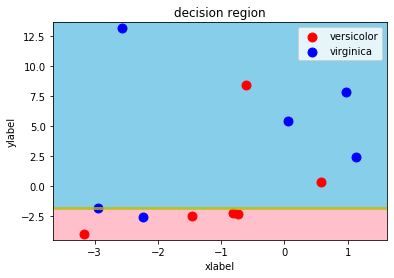

In [237]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
X=train_X
y=train_y
step=0.01
title='decision region'
xlabel='xlabel'
ylabel='ylabel'
target_names=['versicolor', 'virginica']
"""
2値分類を2次元の特徴量で学習したモデルの決定領域を描く。
背景の色が学習したモデルによる推定値から描画される。
散布図の点は訓練データまたは検証データである。
Parameters
----------------
X : ndarray, shape(n_samples, 2)
    特徴量
y : ndarray, shape(n_samples,)
    ラベル
model : object
    学習したモデルのインスンタスを入れる
step : float, (default : 0.1)
    推定値を計算する間隔を設定する
title : str
    グラフのタイトルの文章を与える
xlabel, ylabel : str
    軸ラベルの文章を与える
target_names= : list of str
    凡例の一覧を与える
"""
# setting
scatter_color = ['red', 'blue']
contourf_color = ['pink', 'skyblue']
n_class = 2
# pred
mesh_f0, mesh_f1  = np.meshgrid(np.arange(np.min(X[:,0])-0.5, np.max(X[:,0])+0.5, step), np.arange(np.min(X[:,1])-0.5, np.max(X[:,1])+0.5, step))
mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]

model_mesh=SDT.predict(mesh)
model_mesh=np.array(model_mesh)

y_pred = model_mesh.reshape(mesh_f0.shape)

# plot
plt.title(title)
plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.contourf(mesh_f0, mesh_f1, y_pred, n_class-1, cmap=ListedColormap(contourf_color))
plt.contour(mesh_f0, mesh_f1, y_pred, n_class-1, colors='y', linewidths=3, alpha=0.5)
for i, target in enumerate(np.unique(y)):
    plt.scatter(X[y==target][:, 0], X[y==target][:, 1], s=80, color=scatter_color[i], label=target_names[i], marker='o')
patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
plt.legend(handles=patches)
plt.legend()
plt.show()

【問題7】（アドバンス課題）深さ2の決定木分類器クラスの作成